<a href="https://colab.research.google.com/github/duybluemind1988/Data-science/blob/master/Time_series/Time_series_all_method_2(multy).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Prepare Data

In [11]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
#import yfinance as yf
import cufflinks as cf
from plotly.offline import iplot, init_notebook_mode

In [3]:
!pip install yahoo_fin

In [19]:
from yahoo_fin.stock_info import get_data

stock_code={'Apple':'AAPL', 'Microsoft':'MSFT','Facebook':'Fb','Amazon':'AMZN',
            'Twitter':'TWTR','SP500':'^GSPC'}

df= get_data(stock_code['SP500'],  start_date = '2017-01-01',
                          end_date='2020-09-05',
                      index_as_date = True, interval="1d")
df_sp500=df['adjclose']
df_sp500

2017-01-03    2257.830078
2017-01-04    2270.750000
2017-01-05    2269.000000
2017-01-06    2276.979980
2017-01-09    2268.899902
                 ...     
2020-08-31    3500.310059
2020-09-01    3526.649902
2020-09-02    3580.840088
2020-09-03    3455.060059
2020-09-04    3426.959961
Name: adjclose, Length: 926, dtype: float64

In [5]:
df_gld= get_data("GLD",start_date = '2017-01-01',end_date='2020-09-05',
                      index_as_date = True, interval="1d") # Gold price
df_dxy= get_data("UUP",start_date = '2017-01-01',end_date='2020-09-05',
                      index_as_date = True, interval="1d") # Invesco DB US Dollar 
df_ief= get_data("IEF",start_date = '2017-01-01',end_date='2020-09-05',
                      index_as_date = True, interval="1d") # 10 Year Treasury Bond 
df_gush= get_data("GUSH",start_date = '2017-01-01',end_date='2020-09-05',
                      index_as_date = True, interval="1d") # Direxion Daily S&P Oil & Gas Exp. & Prod. Bull 2X Shares

In [6]:
df_assets = pd.DataFrame({
    'GUSH':df_gush['adjclose'],
    'GLD': df_gld['adjclose'],
    'UUP': df_dxy['adjclose'],
    'IEF': df_ief['adjclose'],
})
df_assets

,GUSH,GLD,UUP,IEF
2017-01-03,21088.333984,110.470001,25.873072,97.661842
2017-01-04,21383.804688,110.860001,25.679264,97.773666
2017-01-05,21168.191406,112.580002,25.407936,98.407555
2017-01-06,20679.062500,111.750000,25.592051,97.960114
2017-01-09,19006.050781,112.669998,25.524220,98.332977
...,...,...,...,...
2020-08-31,32.180000,184.830002,24.900000,121.422005
2020-09-01,31.930000,185.050003,24.950001,121.820000
2020-09-02,30.260000,182.619995,25.040001,121.989998
2020-09-03,29.690001,181.139999,25.049999,122.150002


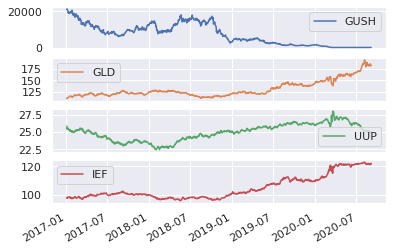

In [17]:
df_assets.plot(subplots=True)
plt.show()

In [7]:
df_assets_1m = df_assets.pct_change(periods=20)
df_assets_1m.columns = ['%s_1m'%col for col in df_assets.columns]
df_assets_1m

,GUSH_1m,GLD_1m,UUP_1m,IEF_1m
2017-01-03,NaN,NaN,NaN,NaN
2017-01-04,NaN,NaN,NaN,NaN
2017-01-05,NaN,NaN,NaN,NaN
2017-01-06,NaN,NaN,NaN,NaN
2017-01-09,NaN,NaN,NaN,NaN
...,...,...,...,...
2020-08-31,-0.027501,-0.004363,-0.015032,-0.009214
2020-09-01,-0.070992,-0.023946,-0.009528,-0.009359
2020-09-02,-0.157338,-0.045623,-0.001595,-0.004660
2020-09-03,-0.143393,-0.065759,-0.001196,-0.004491


In [8]:
df_assets_3m = df_assets.pct_change(periods=60)
df_assets_3m.columns = ['%s_3m'%col for col in df_assets.columns]

df_assets_6m = df_assets.pct_change(periods=120)
df_assets_6m.columns = ['%s_6m'%col for col in df_assets.columns]

In [9]:
df_lagged = df_assets_1m.join(df_assets_3m)\
    .join(df_assets_6m)\
    .dropna()
df_lagged

,GUSH_1m,GLD_1m,UUP_1m,IEF_1m,GUSH_3m,GLD_3m,UUP_3m,IEF_3m,GUSH_6m,GLD_6m,UUP_6m,IEF_6m
2017-06-26,-0.252611,-0.018085,0.000795,0.009861,-0.439513,-0.000929,-0.029661,0.028476,-0.634195,0.071422,-0.056554,0.037455
2017-06-27,-0.179704,-0.011070,-0.009149,0.002371,-0.457343,0.000758,-0.040077,0.021388,-0.637756,0.071712,-0.060000,0.031178
2017-06-28,-0.138596,-0.014260,-0.009968,0.000971,-0.443311,-0.003770,-0.043160,0.015438,-0.629539,0.056138,-0.053013,0.023582
2017-06-29,-0.131835,-0.019881,-0.015930,-0.002241,-0.444986,-0.010868,-0.048884,0.013085,-0.604557,0.058792,-0.064370,0.024422
2017-06-30,-0.060866,-0.029521,-0.009604,-0.008924,-0.392623,-0.013376,-0.046977,0.008808,-0.562395,0.047484,-0.060364,0.018150
...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-31,-0.027501,-0.004363,-0.015032,-0.009214,-0.395541,0.169736,-0.049981,0.016272,0.109911,0.200741,-0.048165,0.034337
2020-09-01,-0.070992,-0.023946,-0.009528,-0.009359,-0.523891,0.158590,-0.045524,0.018498,0.478582,0.252115,-0.056354,0.037200
2020-09-02,-0.157338,-0.045623,-0.001595,-0.004660,-0.470394,0.132457,-0.039140,0.016274,-0.022384,0.274567,-0.087464,0.045463
2020-09-03,-0.143393,-0.065759,-0.001196,-0.004491,-0.390834,0.107416,-0.033938,0.010052,0.217084,0.278876,-0.056852,0.019892


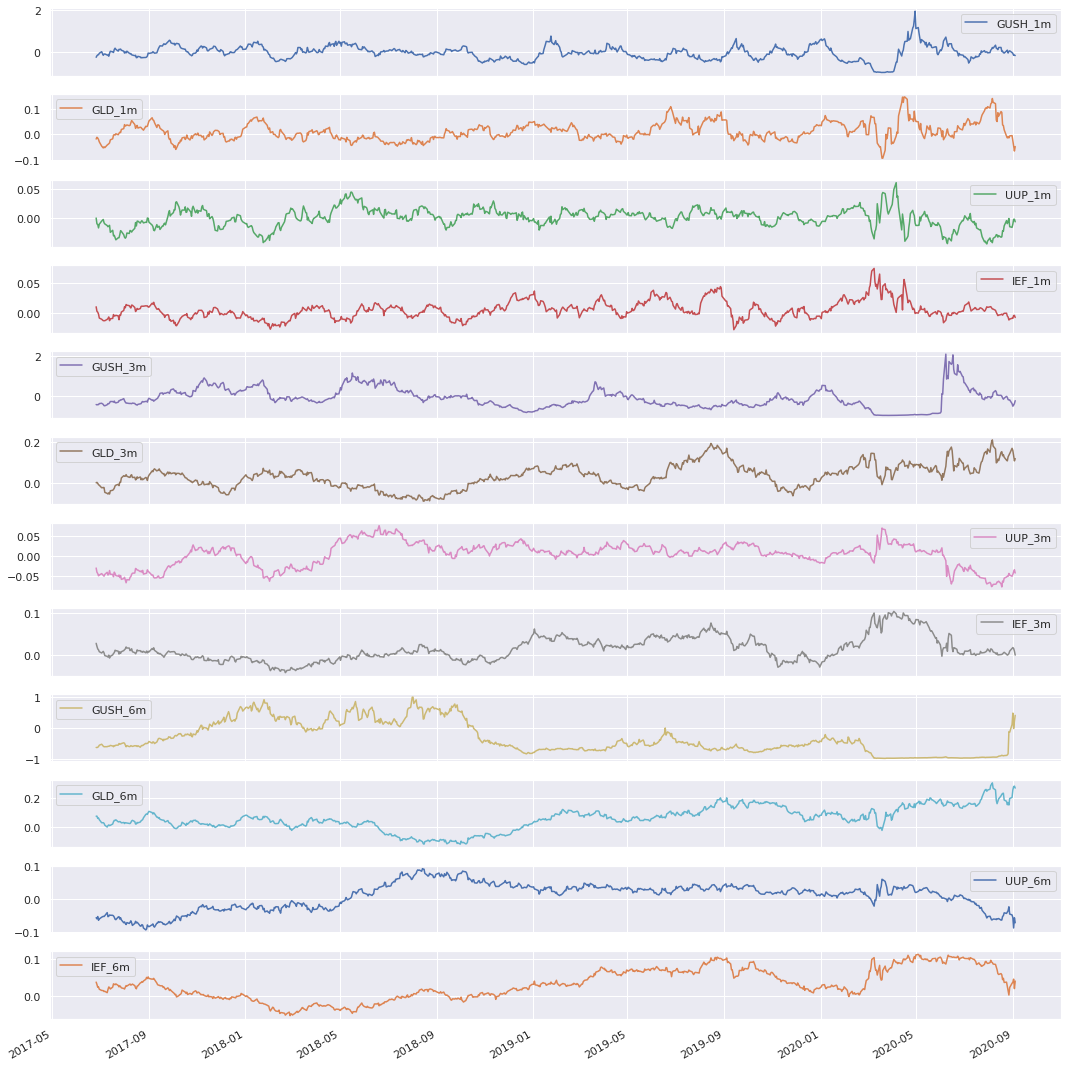

In [22]:
df_lagged.plot(subplots=True,figsize=(15,15))
plt.tight_layout()
plt.show()

In [18]:
df_lagged.shape

(806, 12)

# Preparing the target variables